# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
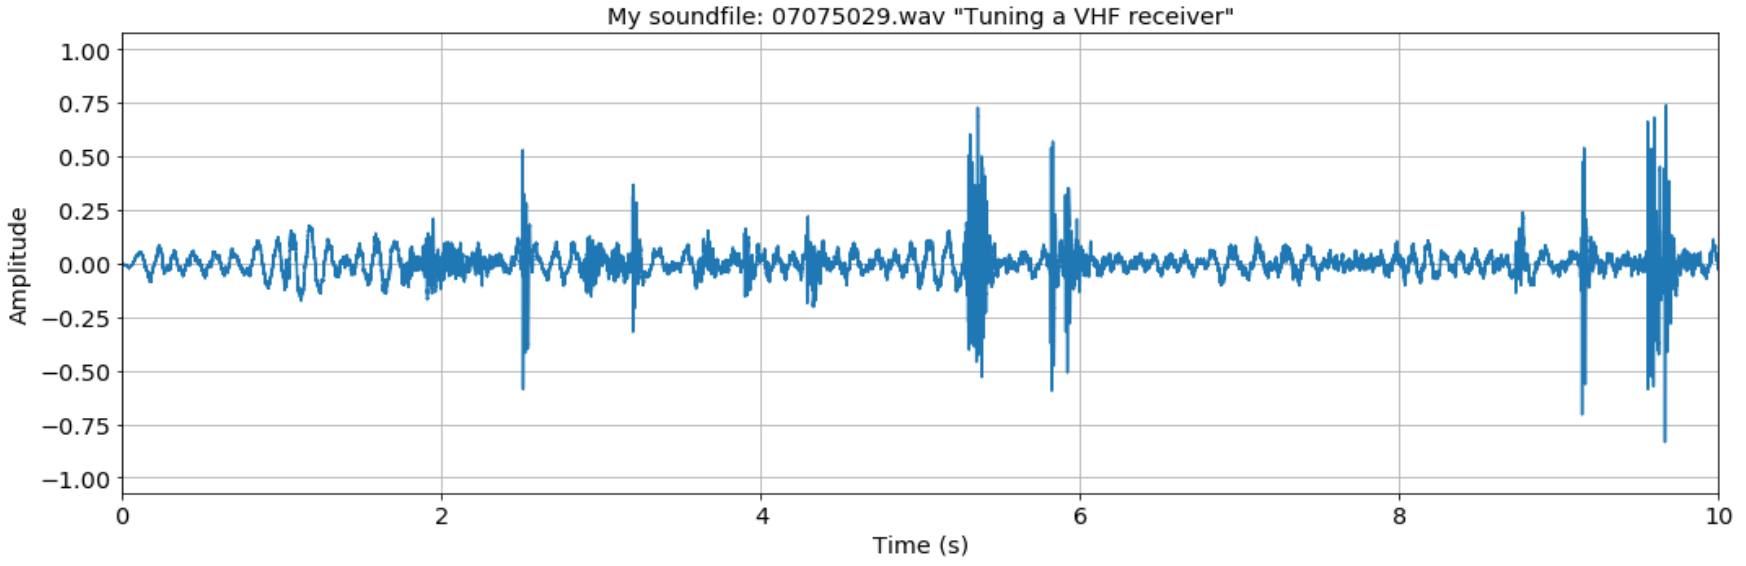

In [2]:
import os

# working directory for lab
#snd_dir = '/media/leboucletoledo/aDATA/WorkDocs/Master/MSc/3_Semester/Music_Informatics/Labs/1/audio_files'
# or use tmp dir
snd_dir = '/tmp/snd'

# selected wav file
wav_file = '07028103.wav'

if not os.path.exists(snd_dir):
    os.makedirs(snd_dir)
if not os.path.isfile(snd_dir + '/' + wav_file):
    !wget --quiet -P /tmp/snd http://bbcsfx.acropolis.org.uk/assets/07028103.wav

In [3]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


def getPlot(Title, x_data, y_data, x_label, y_label):
    plt.figure()
    plt.grid()
    plt.title(Title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data, y_data)
    plt.show()

In [7]:
import pydub
import numpy as np

sound1 = pydub.AudioSegment.from_file(snd_dir + '/' + wav_file, format="wav")
sample_rate = sound1.frame_rate
frame_width = sound1.frame_width
duration_seconds = sound1.duration_seconds

'''
print('Length of sound array: ', len(sound1))
print('Duration of sample sound: ', sound1.duration_seconds)
print('Sample rate of sample sound in Hz: ', sound1.frame_rate)
print('Number of bytes in each sample: ', sound1.sample_width)
print('Number of bytes per frame: ', sound1.frame_width)
print('Number of frames in entire sample: ', sound1.frame_count())
print('Number of frames in 100ms: ', sound1.frame_count(ms=100))
'''

"\nprint('Length of sound array: ', len(sound1))\nprint('Duration of sample sound: ', sound1.duration_seconds)\nprint('Sample rate of sample sound in Hz: ', sound1.frame_rate)\nprint('Number of bytes in each sample: ', sound1.sample_width)\nprint('Number of bytes per frame: ', sound1.frame_width)\nprint('Number of frames in entire sample: ', sound1.frame_count())\nprint('Number of frames in 100ms: ', sound1.frame_count(ms=100))\n"

Length of numeric array with two channels:  1306064
Length of numeric array with one channels:  653032


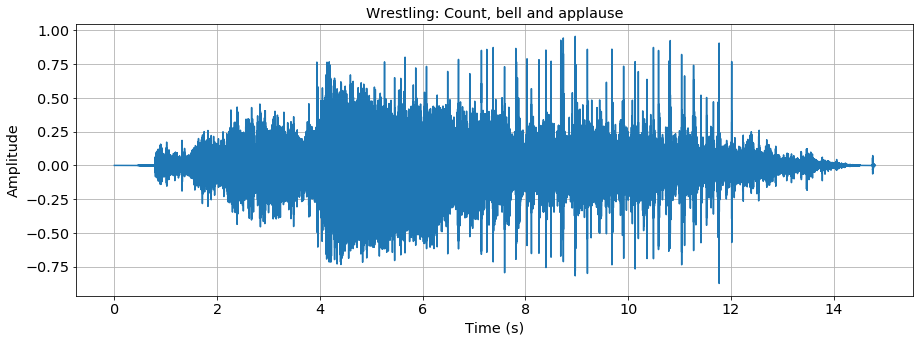

In [8]:
# Convert imported signal to a numeric array, serializing the two chhaels
signal_array = np.array(sound1.get_array_of_samples())    
print('Length of numeric array with two channels: ', len(signal_array))

# Normalize array to [-1, 1]
signal_array = (signal_array / 2**16) * 2 

# Divide in two channels and select one for use
channel_left = signal_array[::2]
channel_right = signal_array[1::2]
signal_array = channel_left
print('Length of numeric array with one channels: ', len(signal_array))

# Create a time vector in seconds for the whole signal
time = np.linspace(0, len(signal_array) / (sample_rate), num=len(signal_array))

getPlot('Wrestling: Count, bell and applause', time, signal_array, 'Time (s)', 'Amplitude')

**The chosen .wav file, "Wrestling: Count, bell and applause" has segments of audio with different dynamics, both in frequency and amplitude. Some of the features for this particular audio are:** 

* **Length of sound array:  14808**
* **Duration of sample sound:  14.80798185941043**
* **Sample rate of sample sound in Hz:  44100**
* **Number of bytes in each sample:  2**
* **Number of frames in entire sample:  653032.0**

**It is important to note that the original audio file contains two channels, so when it is translated to a numeric array both channels are imported sequentially. Slicing that array for using a single channel brings the number of frames to the same number as the original audio file (653032 frames).**

**It is also noted that Pydub handles a default sample rate of 44100 Hz, whereas librosa uses 22050 Hz. This has to be taken into account for the rest of the calculations in this notebook.**


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

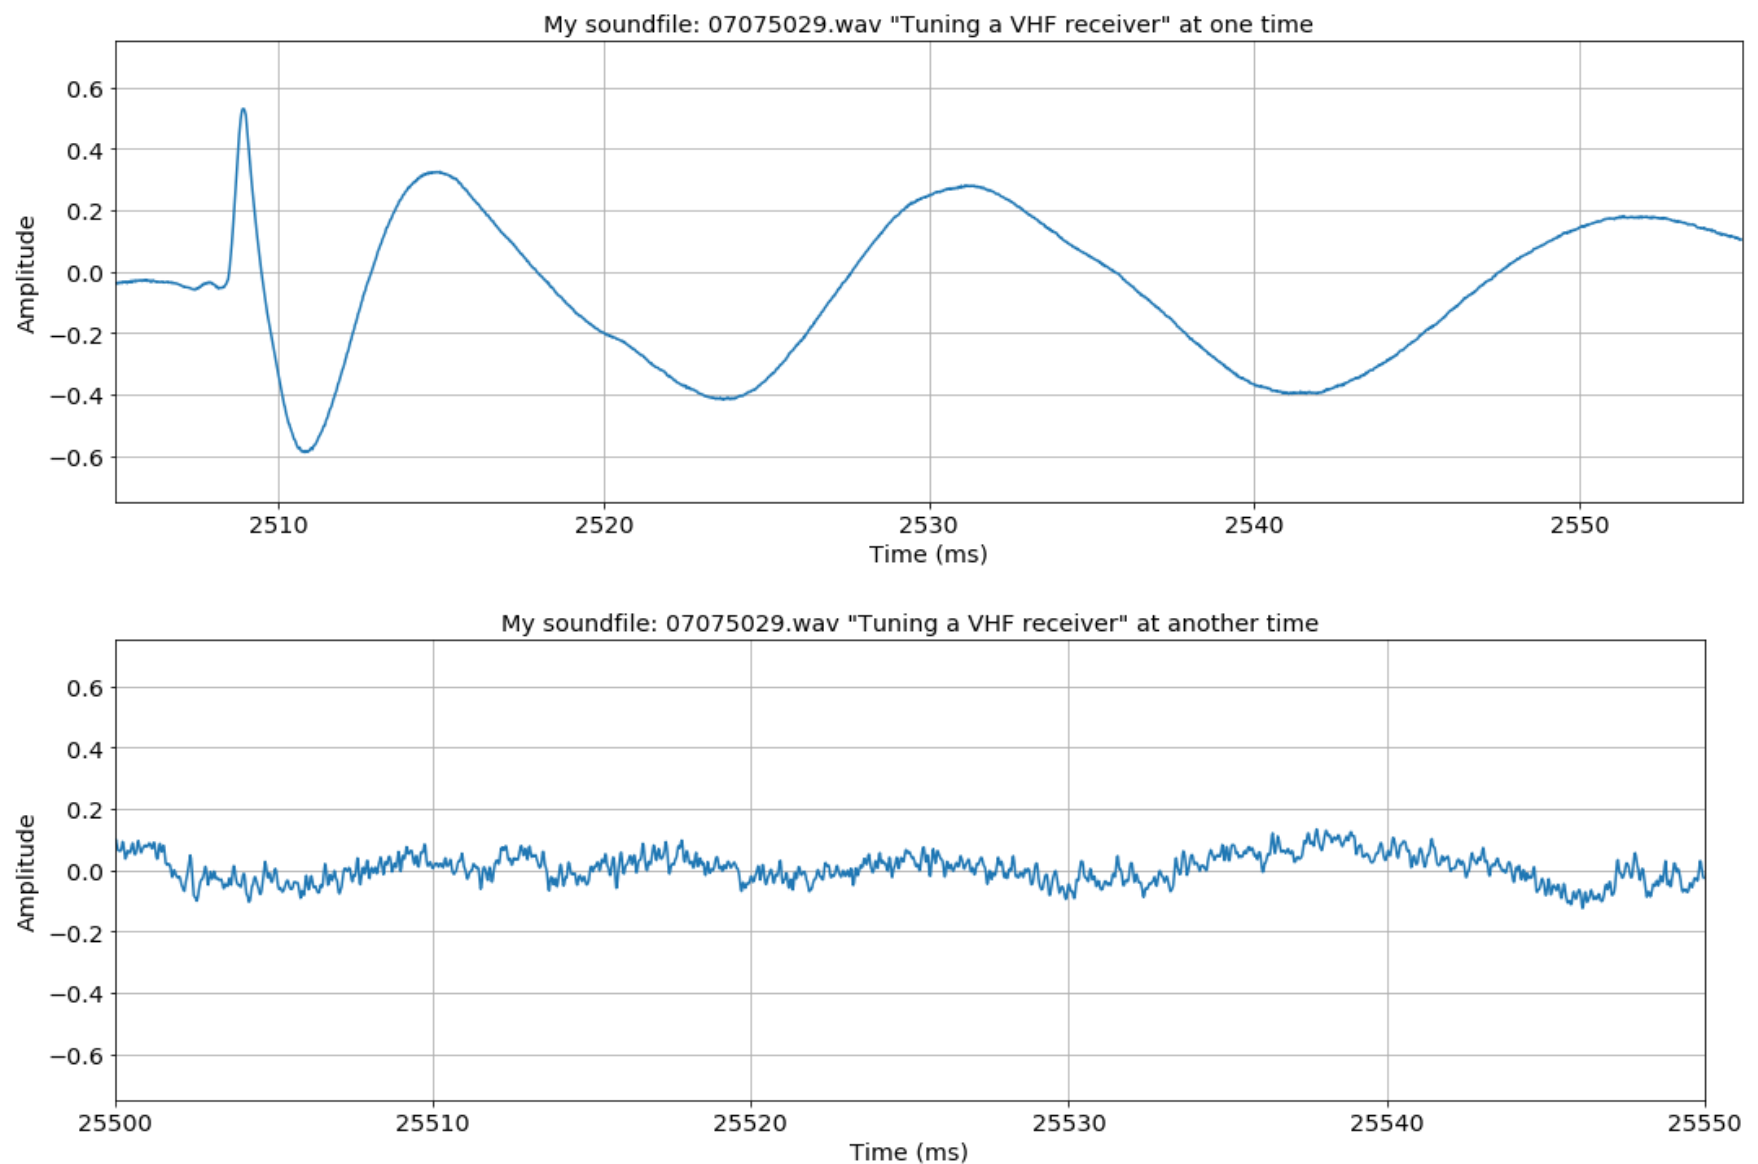

In [9]:
# Create and plot a time vector in seconds for the first portion of the signal

import math

def getLapse(array, start_time, duration, Fs):
    
    stop_time = start_time + duration
    start_time_idx = math.ceil(start_time * Fs)
    stop_time_idx = math.ceil(stop_time * Fs)
    
    time_array = np.linspace(start_time, stop_time, math.ceil(Fs * duration))
    vector = array[start_time_idx:stop_time_idx]
    
    return time_array, vector

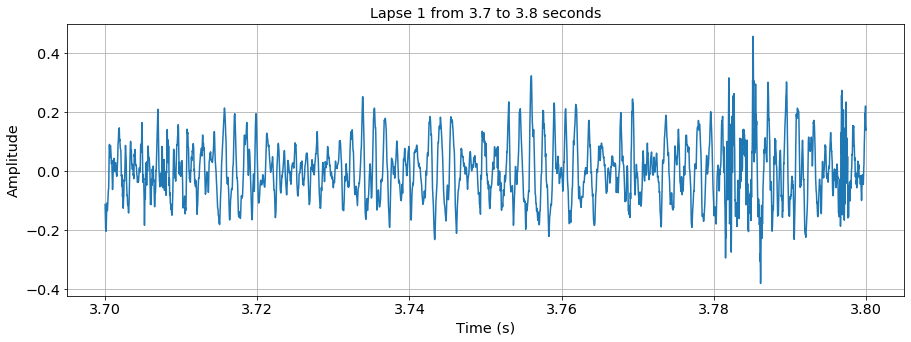

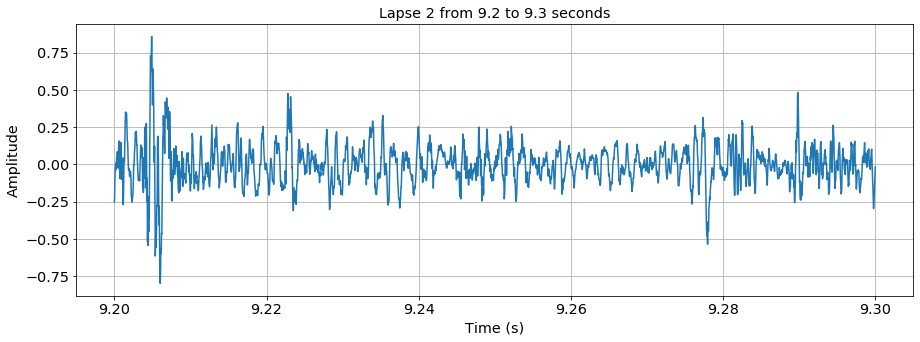

In [10]:
x, lapse1 = getLapse(signal_array, 3.7, 0.1, sample_rate)
getPlot('Lapse 1 from 3.7 to 3.8 seconds',
        x, 
        lapse1, 
        'Time (s)', 
        'Amplitude')

x, lapse2 = getLapse(signal_array, 9.2, 0.1, sample_rate)
getPlot('Lapse 2 from 9.2 to 9.3 seconds',
        x, 
        lapse2, 
        'Time (s)', 
        'Amplitude')

**The two selected 100ms lapses were obtained by creating a function that uses as arguments the audio file to extract the lapse from, the starting time, duration of the segment, and the sample rate of the original audio file**

**Although both signals can be perceived as noisiy, the second segment holds higher amplitude values and a larger margin between the highes spike. The first one is more uniform until it approaches the 3.8s mark; this is when the bell rings in the original file**

3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Window the audio with 1) boxcar, or 2) Hann. (This means you will have create four plots in total , or two plots with two lines each.)

In [15]:
from scipy import signal, fft

def getFFT(lapse, window_type, Fs, dB_output = True):
    num_samples = len(lapse)
    
    if window_type == 'boxcar':
        window_lapse = signal.boxcar(num_samples, sym=False) * lapse
    elif window_type == 'hann':
        window_lapse = signal.hann(num_samples, sym=False) * lapse
    
    # Frequency axis limited to Nyquist frequency (half the sampling rate), converted to KHz
    freq_array = np.linspace(0, Fs / 2, num = int(num_samples/2))
    freq_array /= 1000
    
    # Fast Fourier Transform generated for the windowed time region
    fft_lapse = fft.fft(window_lapse)
    fft_magnitudes = np.abs(fft_lapse)[:int(num_samples/2)]
    
    if dB_output:
        dB_magnitudes = 20 * np.log10(fft_magnitudes/np.max(fft_magnitudes))
        return freq_array, dB_magnitudes
    else:
        return freq_array, fft_magnitudes
        

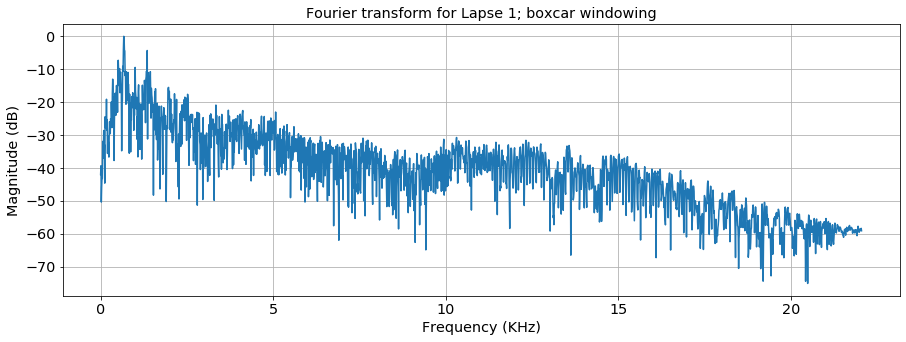

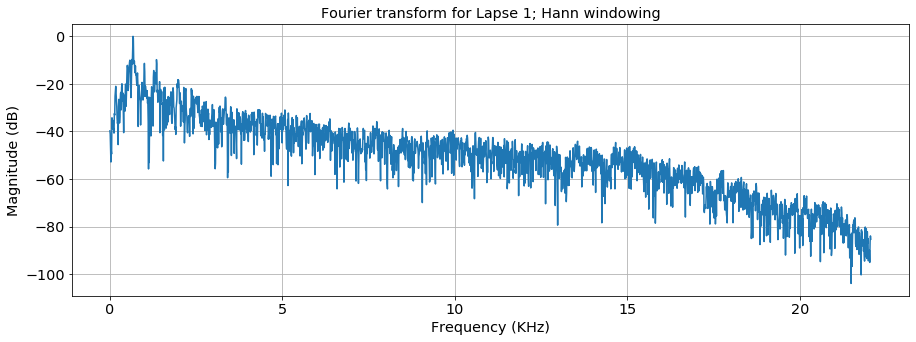

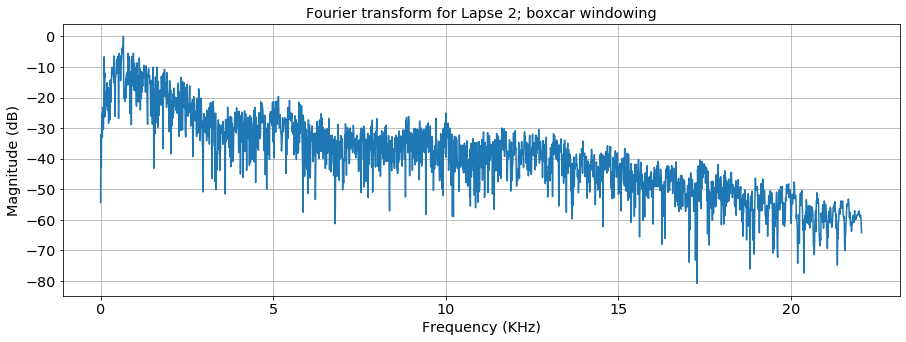

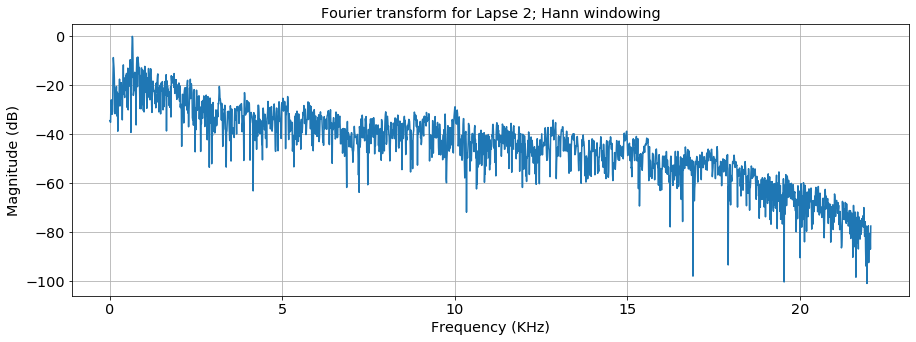

In [16]:
freq_boxcar_1, dB_boxcar_1 = getFFT(lapse1, window_type = 'boxcar', Fs = sample_rate)
getPlot('Fourier transform for Lapse 1; boxcar windowing',
        freq_boxcar_1, 
        dB_boxcar_1, 
        'Frequency (KHz)', 
        'Magnitude (dB)')

freq_hann_1, dB_hann_1 = getFFT(lapse1, window_type = 'hann', Fs = sample_rate)
getPlot('Fourier transform for Lapse 1; Hann windowing',
        freq_hann_1, 
        dB_hann_1, 
        'Frequency (KHz)', 
        'Magnitude (dB)')

freq_boxcar_2, dB_boxcar_2 = getFFT(lapse2, window_type = 'boxcar', Fs = sample_rate)
getPlot('Fourier transform for Lapse 2; boxcar windowing',
        freq_boxcar_2, 
        dB_boxcar_2, 
        'Frequency (KHz)', 
        'Magnitude (dB)')

freq_hann_2, dB_hann_2 = getFFT(lapse2, window_type = 'hann', Fs = sample_rate)
getPlot('Fourier transform for Lapse 2; Hann windowing',
        freq_hann_2, 
        dB_hann_2, 
        'Frequency (KHz)', 
        'Magnitude (dB)')

**The Fourier transform plots show the deconstruction of the 100ms lapses, from the time domain into the frequency domain, with a range between 0 to ~22Khz; the top value represents the Nyquist frequency for the audio file, and avoids showing the mirrored spectra present in the full frequency range for the sample rate. These plots were obtained by means of a FFT algorithm, with previous windowing.**

**It is to be noted that, although both windows show similar trends for each of the segments, the Hann window appears to be smoother and presents higher absolute values in terms of magnitudes. This could be interpreted as normal behavior due to the nature of the windows used, where the boxcar will cut off roughly the analyzed segment and abruptly cause discontinuities not present in the original signal**

4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

In [19]:
import librosa

def getSTFT(lapse, win_length, win_hopsize, plot_Title):
    freq, time, stft = signal.stft(lapse, 
                                   fs=sample_rate, 
                                   window='hann', 
                                   nfft=8192, 
                                   nperseg=int(win_length*sample_rate), 
                                   noverlap=(sample_rate*(win_length - win_hopsize))
                                  )    
    
    # Convert to KHz and get dB for STFT
    freq /= 1000
    stft_magnitudes = np.abs(stft)
    stft_dB = librosa.amplitude_to_db(stft_magnitudes, ref=np.max)
    
    plt.title(plot_Title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (KHz)')
    plt.ylim((0,5))
    plt.pcolormesh(time, freq, stft_dB, cmap='BuGn')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    
    return stft_dB

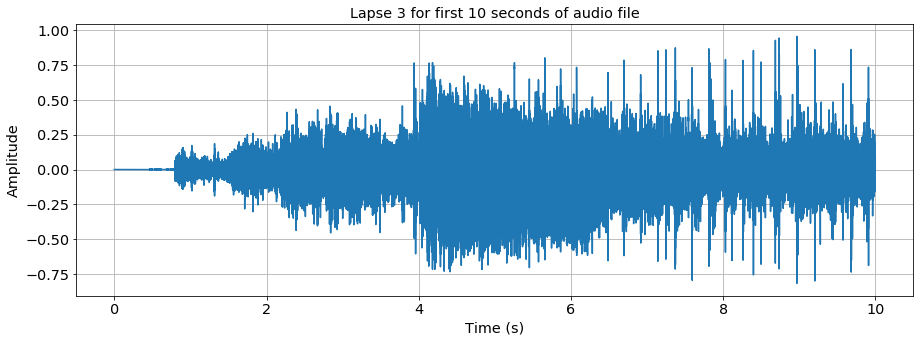

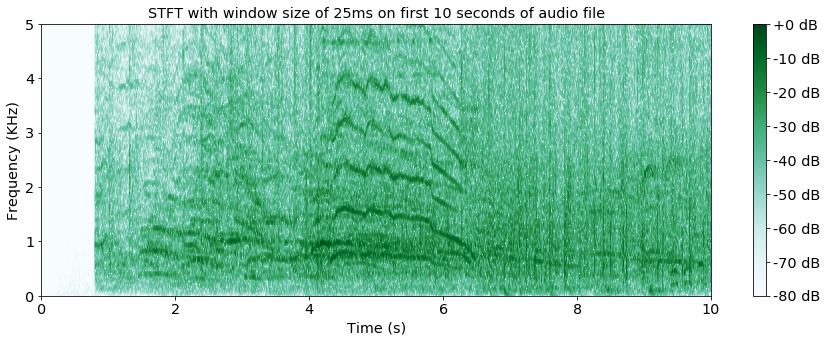

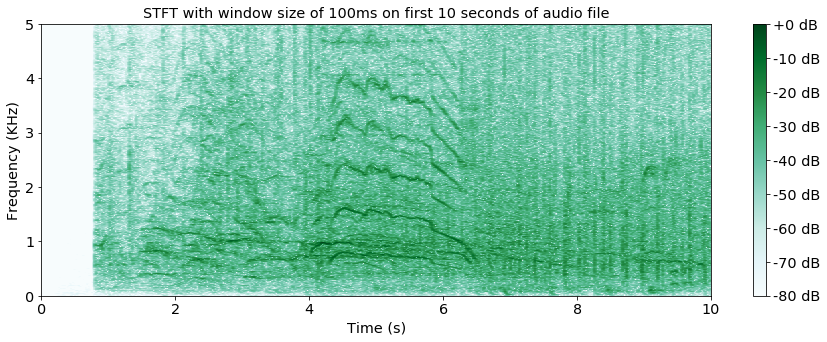

In [18]:
# Generate the array for the first 10 seconds

x, lapse3 = getLapse(signal_array, 0, 10, sample_rate)
getPlot('Lapse 3 for first 10 seconds of audio file',
        x, 
        lapse3, 
        'Time (s)', 
        'Amplitude')

STFT = getSTFT(lapse3, 0.025, 0.010, 'STFT with window size of 25ms on first 10 seconds of audio file')
STFT = getSTFT(lapse3, 0.100, 0.010, 'STFT with window size of 100ms on first 10 seconds of audio file')

**The plotted spectrogrames obtained from the STFT show in which time intervals are different frequencies localized, revealing the time-frequency content of the audio signal.**

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.

> We can see that the longer time window gives a thinner support on harmonics that have a nearly constant frequency, such as in the portion around 2 seconds. However, onsets appear sharper with the shorter window.

**The two generated spectrograms use the Hann window for segmenting the original audio signal, so some frequency smearing is expected that may hinder frequency separation. This is even more exacerbated when using short-time windows: impulses detection is enhanced but at the cost of identifying properly the fundamental frequencies and harmonics that belong to those impulses.**

**For the examples at hand, the long-time window shows with more accuracy the fundamentals and harmonics that happen after the 3.8s mark and last until ~6.3. However, the traces are more distinct on the short-time window spectrogram when other intervals are inspected.**


6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

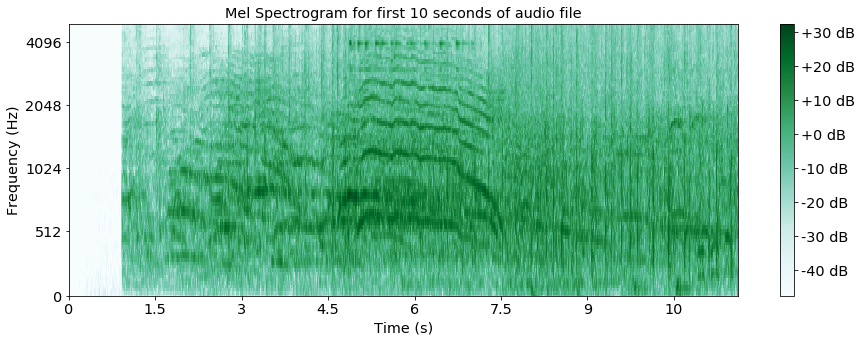

In [21]:
import librosa
import librosa.display

mel_spec = librosa.feature.melspectrogram(lapse3, 
                               sr=sample_rate, 
                               n_fft=8192, 
                               hop_length=int(sample_rate*0.01), 
                               n_mels=128,
                               window='hann', 
                               win_length=int(sample_rate*0.025)
                              )

logmel_spec = librosa.power_to_db(abs(mel_spec))

#plt.figure(figsize=(15, 5))
librosa.display.specshow(logmel_spec, 
                         sr=sample_rate, 
                         #hop_length=int(sample_rate*0.01), 
                         x_axis='time', 
                         y_axis='mel', 
                         cmap='BuGn')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram for first 10 seconds of audio file')
plt.ylim((0,5000))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

**The resulting plot shows a similar spectrogram to the previous ones, having being transformed to the Mel scale which non-linearizes the frequencies to resemble how human ear naturally works; this is done by grouping frequencies in evenly-spaced bins (128 for this particular case). This plot concentrates on the range 0-5Khz and tells also information about how the fundamentals and harmonics are perceived with regards to a reference dB magnitude.**

# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [29]:
def getZeroCrossings(lapse, frame_size, hop_size, noise_thrs = 0.0):
    noise_thrs = float(noise_thrs)
    num_samples = len(lapse)
    num_hops = int(num_samples / hop_size)
    frame_zc = []
    
    for i in range(num_hops):
        start_idx = i * hop_size
        stop_idx = start_idx + frame_size
        
        '''
        print('i: ', i)
        print('Number of samples', num_samples)
        print('Starting index: ', start_idx)
        print('Stopping index: ', stop_idx)
        '''
        if num_samples < stop_idx:
            remaining_samples = stop_idx - num_samples
            break

        #print('Remaining samples: ', remaining_samples)
        zc_counter = 0
        lapse_frame = lapse[start_idx:stop_idx]
        sign_n = np.sign(lapse_frame[0])

        for lapse_idx, div in enumerate(lapse_frame):
            if lapse_idx > 0:
                sign_n1 = np.sign(div)
                if noise_thrs != 0.0:
                    if sign_n1 != 0 and sign_n1 != sign_n and abs(div) > noise_thrs:
                        zc_counter += 1
                        sign_n = sign_n1
                else:
                    if sign_n1 != 0 and sign_n1 != sign_n:
                        zc_counter += 1
                        sign_n = sign_n1                    

        frame_zc.append(zc_counter)
        
    #return np.asarray(frame_zc)
    return np.asarray(frame_zc), len(frame_zc), remaining_samples


2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

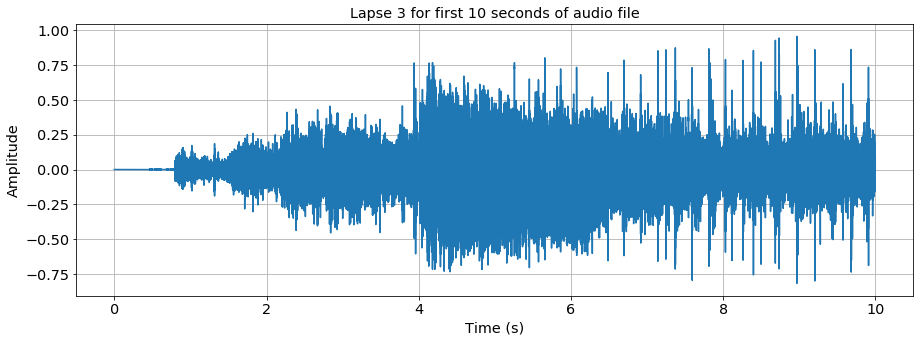

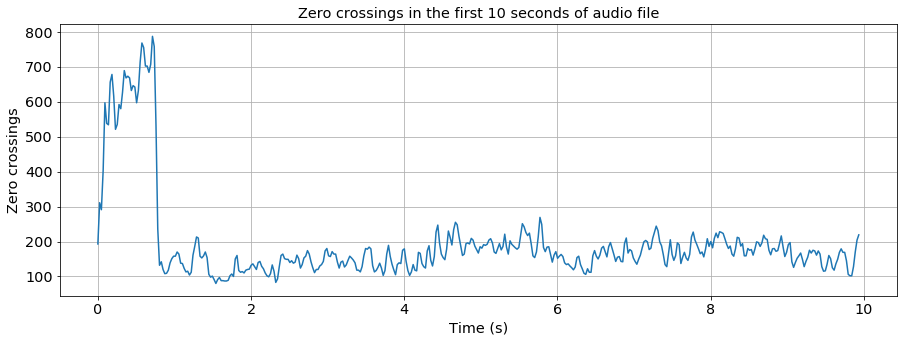

In [30]:
# Generate the array for the first 10 seconds
x, lapse3 = getLapse(signal_array, 0, 10, sample_rate)

# Get the zero crossings for the selected lapse
frame_size = int(46 * sample_rate / 1000)
hop_size = int(frame_size * 0.5)

lapse3_zc, length, unused_samples = getZeroCrossings(lapse3, frame_size, hop_size)
x_zc = np.arange(len(lapse3_zc)) * hop_size / sample_rate

getPlot('Lapse 3 for first 10 seconds of audio file',
        x, 
        lapse3, 
        'Time (s)', 
        'Amplitude')

getPlot('Zero crossings in the first 10 seconds of audio file',
        x_zc, 
        lapse3_zc, 
        'Time (s)', 
        'Zero crossings')

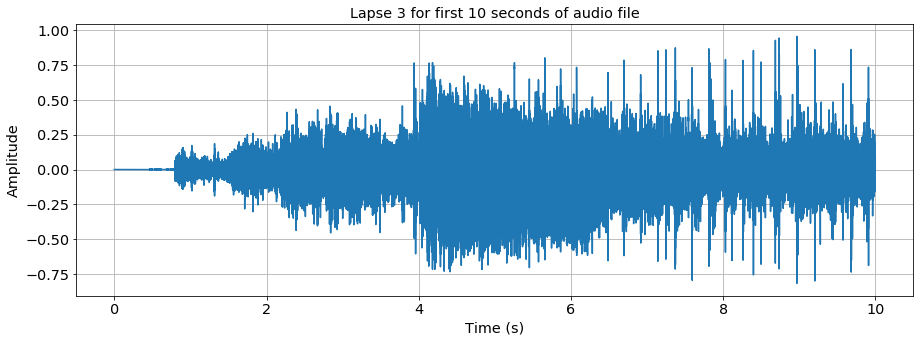

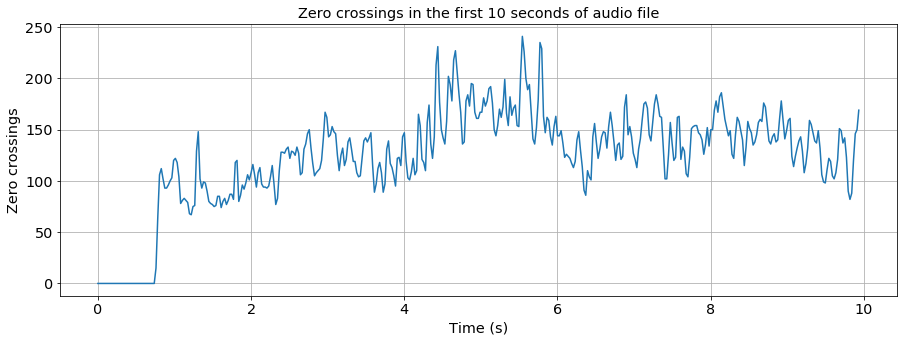

In [31]:
lapse3_zc, length, unused_samples = getZeroCrossings(lapse3, frame_size, hop_size, noise_thrs = 0.01)
x_zc = np.arange(len(lapse3_zc)) * hop_size / sample_rate

getPlot('Lapse 3 for first 10 seconds of audio file',
        x, 
        lapse3, 
        'Time (s)', 
        'Amplitude')

getPlot('Zero crossings in the first 10 seconds of audio file',
        x_zc, 
        lapse3_zc, 
        'Time (s)', 
        'Zero crossings')

**Computing the zero crossings on the first 10 secons of the original audio signals shows that the number of zero crossings increases in the intervals where there is a high amplitude. This behavior can be matched to the original audio signal shape**

**However, the first frames where there is barely any sound also detect several zero crossings; this could be explained due to the noisy signal that is present during the first second where the amplitude could be considered negligible, but will still be detected by the algorithm. Applying a basic filter based on thresholding the absolute value results in ignoring that noisy portion of the signal, without affecting the rest of the signal.**

3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [32]:
def getSpectralCentroids(lapse, frame_size, hop_size, Fs):
    num_samples = len(lapse)
    num_hops = int(num_samples / hop_size)
    frame_centroids = []
    
    for i in range(num_hops):
        start_idx = i * hop_size
        stop_idx = start_idx + frame_size
        
        if num_samples < stop_idx:
            remaining_samples = stop_idx - num_samples
            break
        
        lapse_frame = lapse[start_idx:stop_idx]        
        _, fft_frame = getFFT(lapse_frame, window_type = 'boxcar', Fs = Fs, dB_output = False) 
        
        k = np.arange(fft_frame.shape[0])
        R_x = (Fs / num_samples * np.sum(k * abs(fft_frame))) / np.sum(abs(fft_frame))
        
        frame_centroids.append(R_x)
    
    return np.asarray(frame_centroids)

4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

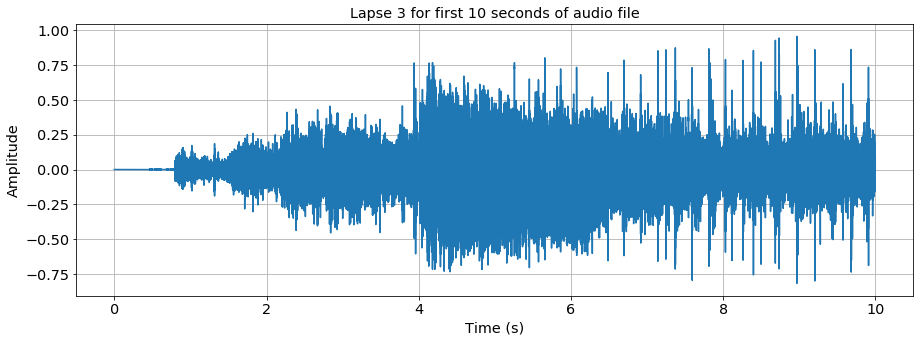

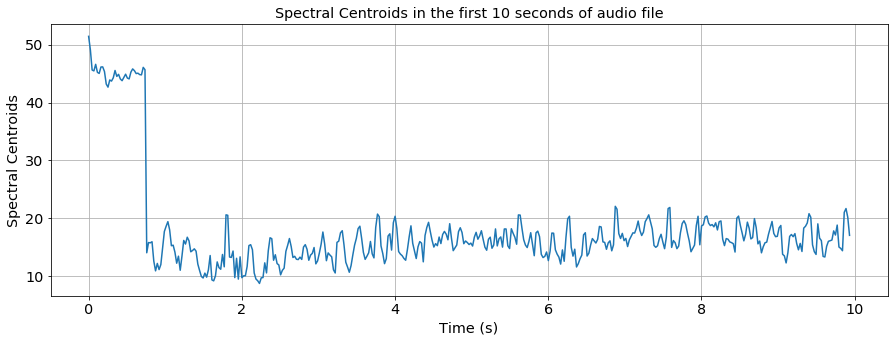

In [33]:
lapse3_sc = getSpectralCentroids(lapse3, frame_size, hop_size, sample_rate)

x_sc = np.arange(len(lapse3_sc)) * hop_size / sample_rate

getPlot('Lapse 3 for first 10 seconds of audio file',
        x, 
        lapse3, 
        'Time (s)', 
        'Amplitude')

getPlot('Spectral Centroids in the first 10 seconds of audio file',
        x_sc, 
        lapse3_sc, 
        'Time (s)', 
        'Spectral Centroids')

**In a similar fashion as with the zero crossings, the number of spectral centroids follows a similar shape as the original audio signal. This feature is usually associated with brightness of a sound, and evaluates a "center of gravity" for a specific spectral frame. The computed number also suffers from an anomalous large number during the first second of the signal, which could also be associated with noise. A filter (low-pass) could potentially be used on the original signal to clean it up before applying the spectral centroid algorithm.**

5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

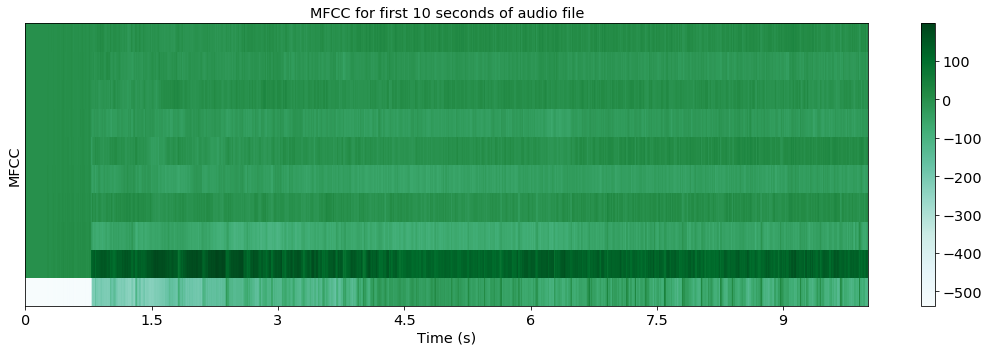

In [36]:
lapse3_mfcc = librosa.feature.mfcc(S=logmel_spec, n_mfcc=10)

librosa.display.specshow(lapse3_mfcc, 
                         sr=sample_rate, 
                         hop_length=int(sample_rate*0.01), 
                         x_axis='time', 
                         #y_axis='mfcc', 
                         cmap='BuGn')
#plt.colorbar(format='%+2.0f dB')
plt.colorbar()
plt.title('MFCC for first 10 seconds of audio file')
#plt.ylim((0,5000))
plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('MFCC')
plt.show()

**Computing the Mel-frequency cepstral coefficients helps summarize the shape of the frequency spectrum with a defined number of coefficients, and can also be associated with the timbre feature. The resulting MFCC plot shows that the noisy portion of the signal (<0.8s) is equally distributed in the non-zero coefficients. After that mark, the first non-zero (second) MFFC is the one that contains the highest values for the most part of the signal.**